In [2]:
import bnn
import numpy as np
import os

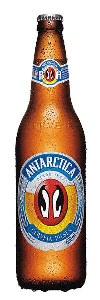

In [3]:
from PIL import Image
im=Image.open('data/6e8e0a4176.jpg')
im=im.resize(size=(100,300))
im

## 1. Hardware accelerated inference

### Case 1: 
#### W1A1 - 1 bit weigth and 1 activation

In [4]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,'aedes',bnn.RUNTIME_HW)

inferred_class = hw_classifier.classify_image(im)
hw_timeW1A1 = hw_classifier.usecPerImage

print("Class number: {0}".format(inferred_class))
print("Class name: {0}".format(hw_classifier.class_name(inferred_class)))

Inference took 1581.00 microseconds
Classification rate: 632.51 images per second
Class number: 1
Class name: Garrafa


In [5]:
rankingsW1A1 = hw_classifier.classify_image_details(im)
print("\n{: >10}{: >13}".format("[CLASS]","[RANKING]"))
for i in range(len(rankingsW1A1)):
    print("{: >10}{: >10}".format(hw_classifier.classes[i],rankingsW1A1[i]))

Inference took 1586.00 microseconds
Classification rate: 630.52 images per second

   [CLASS]    [RANKING]
     Bacia       243
   Garrafa       339
  Garrafao       214
     Jarro       243
      Pneu       237


### Case 2:
#### W1A2 - 1 bit weight and 2 bit activation

In [6]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A2,'aedes',bnn.RUNTIME_HW)

inferred_class = hw_classifier.classify_image(im)
hw_timeW1A2 = hw_classifier.usecPerImage

print("Class number: {0}".format(inferred_class))
print("Class name: {0}".format(hw_classifier.class_name(inferred_class)))

Inference took 1627.00 microseconds
Classification rate: 614.63 images per second
Class number: 1
Class name: Garrafa


In [7]:
rankingsW1A2 = hw_classifier.classify_image_details(im)
print("\n{: >10}{: >13}".format("[CLASS]","[RANKING]"))
for i in range(len(rankingsW1A2)):
    print("{: >10}{: >10}".format(hw_classifier.classes[i],rankingsW1A2[i]))

Inference took 1628.00 microseconds
Classification rate: 614.25 images per second

   [CLASS]    [RANKING]
     Bacia         9
   Garrafa        89
  Garrafao      -101
     Jarro         1
      Pneu       -39


### Case 3:
#### W2A2 - 2 bit weight and 2 bit activation

In [8]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW2A2,'aedes',bnn.RUNTIME_HW)

inferred_class = hw_classifier.classify_image(im)
hw_timeW2A2 = hw_classifier.usecPerImage

print("Class number: {0}".format(inferred_class))
print("Class name: {0}".format(hw_classifier.class_name(inferred_class)))

Inference took 4865.00 microseconds
Classification rate: 205.55 images per second
Class number: 1
Class name: Garrafa


In [9]:
rankingsW2A2 = hw_classifier.classify_image_details(im)
print("\n{: >10}{: >13}".format("[CLASS]","[RANKING]"))
for i in range(len(rankingsW2A2)):
    print("{: >10}{: >10}".format(hw_classifier.classes[i],rankingsW2A2[i]))

Inference took 4865.00 microseconds
Classification rate: 205.55 images per second

   [CLASS]    [RANKING]
     Bacia        23
   Garrafa        72
  Garrafao       -44
     Jarro        -8
      Pneu       -33


## 2. Software inference

In [10]:
sw_W1A1 = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,'aedes',bnn.RUNTIME_SW)
sw_W1A2 = bnn.CnvClassifier(bnn.NETWORK_CNVW1A2,'aedes',bnn.RUNTIME_SW)
sw_W2A2 = bnn.CnvClassifier(bnn.NETWORK_CNVW2A2,'aedes',bnn.RUNTIME_SW)

In [11]:
print("-- Software inference CNVW1A1 --")
out=sw_W1A1.classify_image(im)
sw_timeW1A1=sw_W1A1.usecPerImage
print("Class number: {0}".format(out))

print("\n-- Software inference CNVW1A2 --")
out=sw_W1A2.classify_image(im)
sw_timeW1A2=sw_W1A2.usecPerImage
print("Class number: {0}".format(out))

print("\n-- Software inference CNVW2A2 --")
out=sw_W2A2.classify_image(im)
sw_timeW2A2=sw_W2A2.usecPerImage
print("Class number: {0}".format(out))

-- Software inference CNVW1A1 --
Inference took 1588793.00 microseconds
Classification rate: 0.63 images per second
Class number: 1

-- Software inference CNVW1A2 --
Inference took 5636642.00 microseconds
Classification rate: 0.18 images per second
Class number: 1

-- Software inference CNVW2A2 --
Inference took 9458823.00 microseconds
Classification rate: 0.11 images per second
Class number: 1


## 3. Inference time


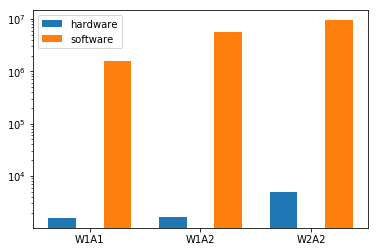

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

hw_bars = [hw_timeW1A1, hw_timeW1A2, hw_timeW2A2]
sw_bars = [sw_timeW1A1, sw_timeW1A2, sw_timeW2A2]

x_pos = np.arange(3)
fig, ax = plt.subplots()
ax.bar(x_pos - 0.25, hw_bars, 0.25)
ax.bar(x_pos + 0.25, sw_bars, 0.25)
ax.set_xticklabels(["W1A1","W1A2","W2A2"], rotation='horizontal')
ax.set_xticks(x_pos)
plt.legend(["hardware","software"])
plt.semilogy()
plt.show()

In [13]:
from pynq import Xlnk

xlnk = Xlnk()
xlnk.xlnk_reset()